In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
print("Done")

Done


In [2]:
dataset_path = r"C:\Users\anany\Downloads\ASL-Alphabet\asl_alphabet_train\asl_alphabet_train"
print("Done")

Done


In [3]:
classes = sorted(os.listdir(dataset_path))
print(f"Classes: {classes}")

Classes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


In [4]:
data = []
labels = []
print("Done")

Done


In [5]:
for class_label in classes:
    class_dir = os.path.join(dataset_path, class_label)

    if os.path.isdir(class_dir):
        for img_file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_file)

            # Check if the file is a valid image
            valid_extensions = (".jpg", ".jpeg", ".png", ".bmp")
            if not img_file.lower().endswith(valid_extensions):
                print(f"Skipping non-image file: {img_file}")
                continue

            if not os.path.exists(img_path):
                print(f"File not found: {img_path}")
                continue

            image = cv2.imread(img_path)
            if image is None:
                print(f"Failed to load image: {img_path}")
                continue

            # Resize image to 64x64 pixels
            image = cv2.resize(image, (64, 64))

            # Grayscale conversion
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Apply Gaussian Blur
            blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

            # Histogram Equalization
            equalized_image = cv2.equalizeHist(blurred_image)

            # Edge Detection (Canny)
            edges = cv2.Canny(equalized_image, 100, 200)

            # Append the final preprocessed image and the label
            data.append(edges)
            labels.append(classes.index(class_label))

            # Breaking early to show sample output after each step
            if len(data) >= 1:  # This is just to visualize, remove this limit for full dataset processing
                break

print("Done")


Done


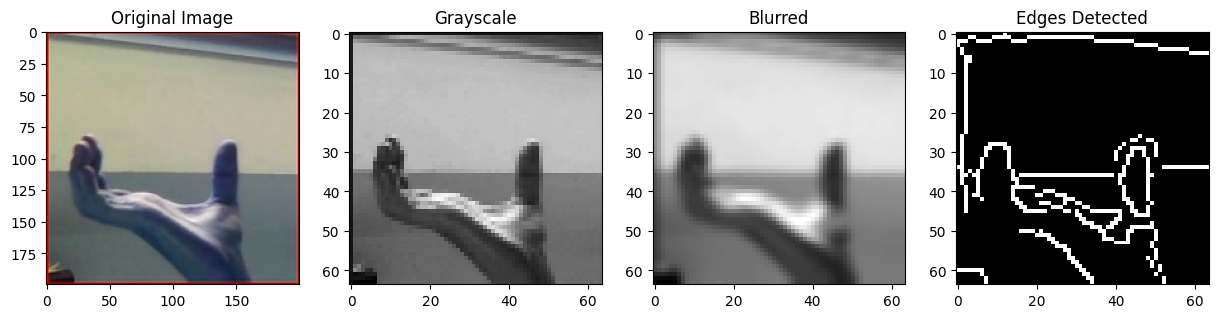

In [6]:
# Step 14: Visualizing the preprocessing steps on a sample image

# Original Image
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.imshow(cv2.imread(img_path))
plt.title('Original Image')

# Grayscale Image
plt.subplot(1, 4, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale')

# Blurred Image
plt.subplot(1, 4, 3)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred')

# Edges Detected Image
plt.subplot(1, 4, 4)
plt.imshow(edges, cmap='gray')
plt.title('Edges Detected')
plt.show()

In [7]:
for class_label in classes:
    class_dir = os.path.join(dataset_path, class_label)

    if os.path.isdir(class_dir):
        for img_file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_file)
            image = cv2.imread(img_path)

            # Resize image to 64x64 pixels
            image = cv2.resize(image, (64, 64))

            # Step 10: Grayscale conversion
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Step 11: Apply Gaussian Blur
            blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

            # Step 12: Histogram Equalization
            equalized_image = cv2.equalizeHist(blurred_image)

            # Step 13: Edge Detection (Canny)
            edges = cv2.Canny(equalized_image, 100, 200)

            # Append the final preprocessed image and the label
            data.append(edges)
            labels.append(classes.index(class_label))
            
print("Done")

Done


In [8]:
data = np.array(data)
data = data.reshape(data.shape[0], 64, 64, 1)

print("Done")

Done


In [9]:
labels = np.array(labels)
labels = to_categorical(labels, num_classes=len(classes))

print("Done")

Done


In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print("Done")

Done


In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0

print("Done")

Done


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(classes), activation='softmax')
])

print("Done")

Done


In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("Done")

Done


In [29]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

print("Done")

Epoch 1/10
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 73s 33ms/step - accuracy: 0.6838 - loss: 1.0700 - val_accuracy: 0.9575 - val_loss: 0.1286
Epoch 2/10
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 70s 32ms/step - accuracy: 0.9768 - loss: 0.0699 - val_accuracy: 0.9710 - val_loss: 0.0869
Epoch 3/10
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 70s 32ms/step - accuracy: 0.9888 - loss: 0.0340 - val_accuracy: 0.9701 - val_loss: 0.0902
Epoch 4/10
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 70s 32ms/step - accuracy: 0.9912 - loss: 0.0261 - val_accuracy: 0.9829 - val_loss: 0.0560
Epoch 5/10
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 70s 32ms/step - accuracy: 0.9939 - loss: 0.0188 - val_accuracy: 0.9785 - val_loss: 0.0707
Epoch 6/10
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 71s 33ms/step - accuracy: 0.9952 - loss: 0.0159 - val_accuracy: 0.9790 - val_loss: 0.0673
Epoch 7/10
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 70s 32ms/step - accuracy: 0.9960 - loss: 0.0131 - val_accuracy: 0.9862 - val_loss: 0.0430
Epoch 8/10
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 70s 32ms/step - accuracy: 0.9968 -

In [14]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

print("Done")

544/544 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.0312 - loss: 3.3699
Test Accuracy: 0.031138688325881958
Done


In [15]:
model.save(r'C:\Users\anany\Downloads\DualSign_Files\sign_language_model.h5')
print("Done")

Done


In [16]:
# Path to the folder on Google Drive (adjust the path accordingly)
sample_images_folder = r'C:\Users\anany\Downloads\DualSign_Files\trial'
print("Done")

Done


# SIGN TO TEXT

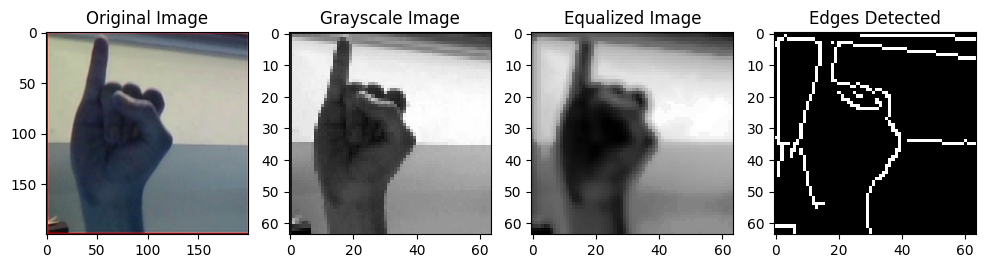

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predicted label for 1.jpg: I


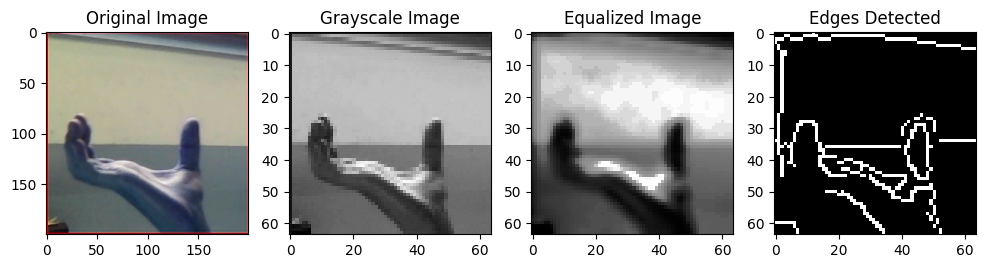

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted label for 2.jpg: space


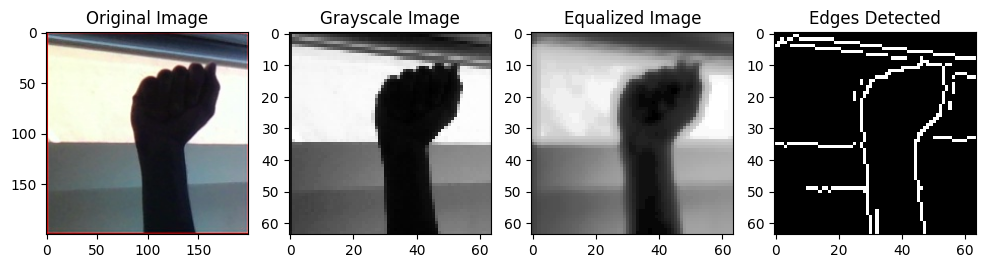

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted label for 3.jpg: A


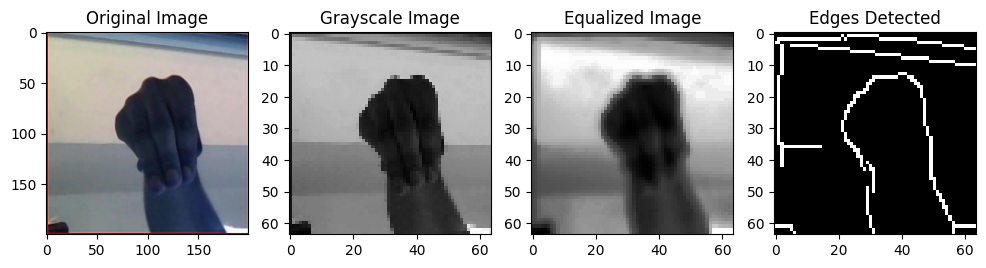

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted label for 4.jpg: M


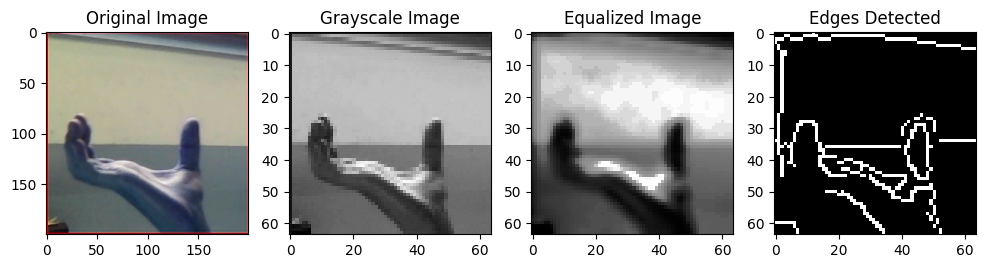

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted label for 5.jpg: space


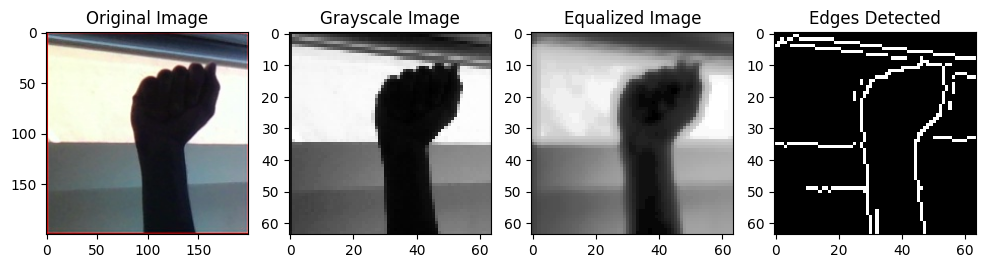

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted label for 6.jpg: A


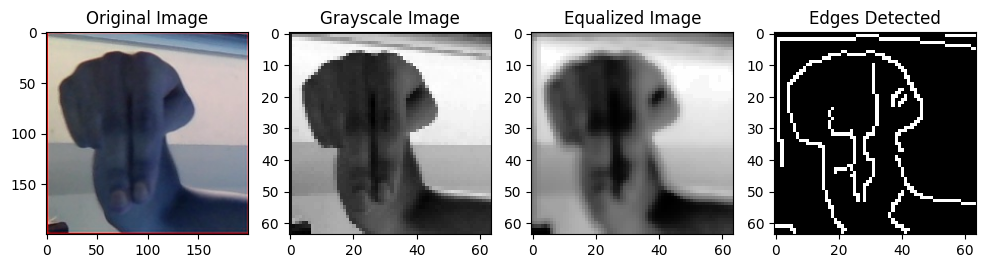

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted label for 7.jpg: N


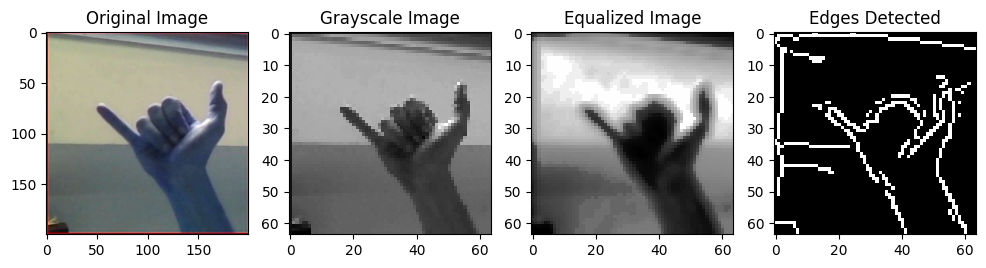

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted label for 8.jpg: Y
Formed Sentence: I AM ANY
Done


In [20]:
from keras.models import load_model
# Function to preprocess images, predict sign, and form a sentence
def predict_sign_and_form_sentence(model, images_folder, classes):
    sentence = ""

    # Loop through each image in the folder
    for img_file in sorted(os.listdir(images_folder)):  # Ensure files are read in sorted order
        img_path = os.path.join(images_folder, img_file)

        # Load image
        image = cv2.imread(img_path)

        # Preprocess the image
        image_resized = cv2.resize(image, (64, 64))
        gray_image = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
        blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
        equalized_image = cv2.equalizeHist(blurred_image)
        edges = cv2.Canny(equalized_image, 100, 200)

        # Show intermediate processing steps
        plt.figure(figsize=(12, 8))
        plt.subplot(1, 4, 1)
        plt.imshow(image)
        plt.title("Original Image")

        plt.subplot(1, 4, 2)
        plt.imshow(gray_image, cmap='gray')
        plt.title("Grayscale Image")

        plt.subplot(1, 4, 3)
        plt.imshow(equalized_image, cmap='gray')
        plt.title("Equalized Image")

        plt.subplot(1, 4, 4)
        plt.imshow(edges, cmap='gray')
        plt.title("Edges Detected")

        plt.show()

        # Reshape the image for the model
        image_input = edges.reshape(1, 64, 64, 1)
        image_input = image_input / 255.0  # Normalize

        # Predict class
        prediction = model.predict(image_input)
        predicted_class = np.argmax(prediction)

        # Get the predicted label
        predicted_label = classes[predicted_class]

        print(f"Predicted label for {img_file}: {predicted_label}")

        # Handle special cases for space and delete
        if predicted_label == "space":
            sentence += " "
        elif predicted_label == "del":
            sentence = sentence[:-1]  # Remove last character
        else:
            sentence += predicted_label  # Append predicted letter

    return sentence

# Load your trained model here
model = load_model(r'C:\Users\anany\Downloads\DualSign_Files\sign_language_model.h5')

# List of classes for ASL
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O',
           'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

# Predict sentence using the images in the folder
final_sentence = predict_sign_and_form_sentence(model, sample_images_folder, classes)
print(f"Formed Sentence: {final_sentence}")

print("Done")

# TEXT TO SIGN

In [21]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

special_char_map = {
    ' ': 'space',
    '': 'nothing'
}

# Function to get the path for a random image of a given letter
def get_image_path_for_letter(letter):
    # Handle space and other special characters
    if letter == ' ':
        folder_name = special_char_map[' ']
    elif letter == '':
        folder_name = special_char_map['']
    else:
        folder_name = letter.upper()

    folder_path = os.path.join(dataset_path, folder_name)

    # Get a random image from the folder
    image_filename = random.choice(os.listdir(folder_path))
    return os.path.join(folder_path, image_filename)

# Function to display images for a given sentence
def display_sign_language_for_sentence(sentence):
    # Prepare the figure for displaying the images
    plt.figure(figsize=(15, 5))

    for index, letter in enumerate(sentence):
        image_path = get_image_path_for_letter(letter)

        # Load the image
        image = Image.open(image_path)

        # Display the image
        plt.subplot(1, len(sentence), index + 1)
        plt.imshow(image)
        plt.axis('off')
        plt.title(letter.upper() if letter != ' ' else 'Space')

    plt.show()

print("Done")

Done


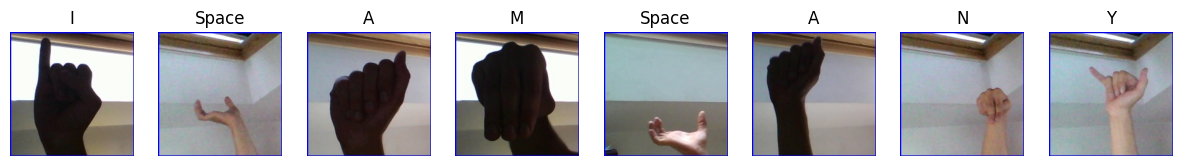

In [22]:
# Example usage:
sentence = "I AM ANY"  # Provide your sentence here
display_sign_language_for_sentence(sentence)

In [ ]:
Realtime 

In [19]:
import cv2
import numpy as np
import os
from keras.models import load_model
import time  # Import for delay management

# Load your trained model
model = load_model(r'C:\Users\anany\Downloads\DualSign_Files\sign_language_model.h5')

# List of classes for ASL
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O',
           'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

# Function to preprocess frames
def preprocess_frame(frame):
    image_resized = cv2.resize(frame, (64, 64))
    gray_image = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    equalized_image = cv2.equalizeHist(blurred_image)
    edges = cv2.Canny(equalized_image, 100, 200)
    # Normalize and reshape the image for the model
    image_input = edges.reshape(1, 64, 64, 1) / 255.0
    return image_input, edges

# Initialize webcam
cap = cv2.VideoCapture(1)

# Initialize sentence and time buffers
sentence = ""
start_time = time.time()  # Record the time the camera starts
last_prediction_time = 0  # Initialize with 0 for the first prediction
initial_delay = 5  # Delay in seconds before starting predictions
prediction_delay = 5  # Gap in seconds between consecutive predictions

print("Press 'q' to quit.")
while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to capture frame.")
        break

    # Define the region of interest (ROI)
    x_start, y_start, box_size = 100, 100, 200
    x_end, y_end = x_start + box_size, y_start + box_size
    cv2.rectangle(frame, (x_start, y_start), (x_end, y_end), (255, 0, 0), 2)
    roi = frame[y_start:y_end, x_start:x_end]

    # Check if the initial delay has passed
    current_time = time.time()
    if current_time - start_time > initial_delay:
        # Check if the prediction delay has passed
        if current_time - last_prediction_time > prediction_delay:
            # Preprocess the ROI
            processed_roi, edges = preprocess_frame(roi)

            # Predict the sign
            prediction = model.predict(processed_roi)
            predicted_class = np.argmax(prediction)
            predicted_label = classes[predicted_class]

            # Handle special cases for space and delete
            if predicted_label == "space":
                sentence += " "
            elif predicted_label == "del" and sentence:
                sentence = sentence[:-1]  # Remove last character
            elif predicted_label != "nothing":
                sentence += predicted_label  # Append predicted letter

            # Update last prediction time
            last_prediction_time = current_time

            # Display intermediate processing results for debugging (optional)
            cv2.imshow("Edges Detected", edges)

    # Display predictions and sentence
    if current_time - last_prediction_time <= prediction_delay:
        # Display the most recent prediction
        cv2.putText(frame, f"Prediction: {predicted_label}", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    else:
        # Clear prediction text if no new prediction is made
        cv2.putText(frame, f"Prediction: Waiting...", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2.putText(frame, f"Sentence: {sentence}", (10, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    # Display the frame
    cv2.imshow("Sign Language Recognition", frame)

    # Exit on pressing 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()

print(f"Final Sentence: {sentence}")
print("Done.")

Press 'q' to quit.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Final Sentence: XNQQDIAF
Done.
